In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./data/ControllerData-ver0.5.csv')
df.shape


(1163, 5)

In [3]:
df.sample(10)

,x,y,rx,ry,type
384,0.006222,-0.607613,-0.965017,-0.450530,1
952,0.088569,-0.801155,-0.955456,-0.030358,1
877,0.018472,0.504750,-0.131488,-0.962487,1
836,-0.077023,-0.395893,-0.895920,0.415880,1
281,-0.018398,-0.378108,-0.392380,0.753902,1
255,0.070375,0.615646,-1.000000,-0.258114,1
881,0.107347,-0.235825,-0.920975,-0.092597,1
1017,0.054860,0.638293,-0.889701,0.565394,1
793,-0.012844,-0.506569,-0.714733,0.573287,1
763,0.102187,-0.517082,-1.000000,0.433555,1


In [4]:
df.dropna(axis=0, how='any')

,x,y,rx,ry,type
0,0.187561,0.207756,0.057475,0.000381,0
1,-0.088399,-0.470748,-0.418196,-0.490245,1
2,-0.438049,-0.225483,0.284041,0.863913,1
3,-0.006805,0.663217,-0.090068,-0.156803,1
4,0.430361,0.448622,-0.134916,-0.032047,1
...,...,...,...,...,...
1158,-0.306815,0.136027,-0.141678,0.057475,1
1159,-0.286333,0.400255,0.019028,-0.005753,1
1160,0.084563,-0.731109,-0.820559,0.355154,1
1161,0.081865,0.800006,-0.819878,-0.359995,1


In [5]:
df1 = df.copy()

In [6]:
df1 = df1.round(4)

In [7]:
df1 = df1.dropna(axis=0, how='any')


In [8]:
data_1 = df1.loc[df1['type'] == 1]
data_2 = df1.loc[df1['type'] == 0]
data_2.sample(20)

,x,y,rx,ry,type
95,0.0244,0.4171,0.0195,-0.3353,0
961,-0.0004,-0.2935,-0.0281,-0.0469,0
594,-0.1235,0.3493,-0.2232,0.2650,0
415,0.0085,0.2207,-0.2446,-0.4463,0
1136,0.1995,0.2732,0.0176,-0.2312,0
510,0.2668,-0.2040,0.0993,-0.0310,0
950,0.0070,-0.3861,0.0223,0.0510,0
1149,0.0193,0.2871,-0.4312,-0.2197,0
75,-0.0859,-0.2611,-0.0130,0.4031,0
303,-0.1067,0.4502,-0.4364,-0.3174,0


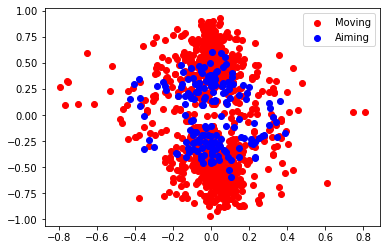

In [25]:
from cProfile import label
from turtle import color

X_data_1 = pd.DataFrame(data_1, columns=['x'])
Y_data_1 = pd.DataFrame(data_1, columns=['y'])
X_data_2 = pd.DataFrame(data_2, columns=['x'])
Y_data_2 = pd.DataFrame(data_2, columns=['y'])
plt.scatter(X_data_1, Y_data_1, color='red', label='Moving')
plt.scatter(X_data_2, Y_data_2, color='blue', label='Aiming')
plt.legend(loc='upper right')
plt.show()

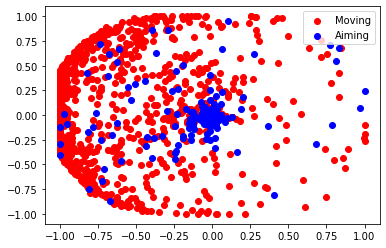

In [26]:
RX_data_1 = pd.DataFrame(data_1, columns=['rx'])
RY_data_1 = pd.DataFrame(data_1, columns=['ry'])
RX_data_2 = pd.DataFrame(data_2, columns=['rx'])
RY_data_2 = pd.DataFrame(data_2, columns=['ry'])
plt.scatter(RX_data_1, RY_data_1, color='red', label = 'Moving')
plt.scatter(RX_data_2, RY_data_2, color='blue', label = 'Aiming')
plt.legend(loc='upper right')
plt.show()

In [27]:
df_X = df1.loc[:, ['x', 'y', 'rx', 'ry']]
df_y = df1.type

In [28]:
df_y

0       0
1       1
2       1
3       1
4       1
       ..
1158    1
1159    1
1160    1
1161    1
1162    1
Name: type, Length: 1163, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=123)

In [30]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.8394495412844036
0.8487972508591065


In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def PolynomialLogisticRegression(degree):
  return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('log_reg', LogisticRegression())
  ])

poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(X_train, y_train)
print(poly_log_reg.score(X_train, y_train))
print(poly_log_reg.score(X_test, y_test))

print('+++++++++++++++++')
y_predict = poly_log_reg.predict(X_test)
print("pricision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1: ",f1_score(y_test, y_predict))



0.8646788990825688
0.8831615120274914
+++++++++++++++++
pricision:  0.9101123595505618
recall:  0.9604743083003953
f1:  0.9346153846153846


In [32]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(loss='hinge', penalty='elasticnet')
sgdc.fit(X_train, y_train)
print(sgdc.score(X_train, y_train))
print(sgdc.score(X_test, y_test))

0.8509174311926605
0.8694158075601375


In [33]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))
print("+++++++++++++++++++++++++++++")
y_predict = svc.predict(X_test)
print("precision: ", precision_score(y_test, y_predict))
print("recall: ", recall_score(y_test, y_predict))
print("f1: ", f1_score(y_test, y_predict))

0.8853211009174312
0.9106529209621993
+++++++++++++++++++++++++++++
precision:  0.9416342412451362
recall:  0.9565217391304348
f1:  0.9490196078431372


In [34]:
svc.intercept_

array([1.46413595])

In [35]:
import pickle
pickle.dump(svc, open('svc_model', 'wb'))

In [36]:
pickle.dump(log_reg, open('log_reg', 'wb'))

In [47]:
pickle.dump(poly_log_reg, open('poly_log_reg.pkl', 'wb'))

In [38]:
from joblib import dump
dump(poly_log_reg, 'poly_log_reg.joblib')

['poly_log_reg.joblib']

In [39]:
model = pickle.load(open('svc_model', 'rb'))
y = model.predict(X_test)
print("precision: ", precision_score(y_test, y))

precision:  0.9416342412451362


In [40]:
model.predict([["0.11008091156299298","0.40200244463407075","0.05479982724556556","-0.042620798716178306"]])


/Users/khalillee/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])